# Optimization, Newton Methods, & Profit Maximization

### Import relevant packages

In [1]:
import sympy as sm
import numpy as np
import pandas as pd

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import animation

from optimization import newton_method, gradient_descent, constrained_newton_method


## Part 1: Optimization Theory

### Gradient Descent

In [2]:
## Gradient Descent Visualization

x  = sm.symbols('x')

function = 3*x**2 + 2*x - 24

symbols = [x]
x0 = {x:3}

GD_values = gradient_descent(function,symbols,x0,iterations=20)

Starting Values: [3]
Step 1: [1.]
Step 2: [0.2]
Step 3: [-0.12]
Step 4: [-0.248]
Step 5: [-0.2992]
Step 6: [-0.31968]
Step 7: [-0.327872]
Step 8: [-0.3311488]
Step 9: [-0.33245952]
Step 10: [-0.33298381]
Step 11: [-0.33319352]
Step 12: [-0.33327741]
Step 13: [-0.33331096]
Step 14: [-0.33332439]
Step 15: [-0.33332975]
Step 16: [-0.3333319]

Convergence Achieved (17 iterations): Solution = {x: -0.3333327606710272}


### Newton Method

In [3]:
## Optimization

x, y  = sm.symbols('x y')

function = 100*(y-x**2)**2 + (1-x)**2

symbols = [x,y]
x0 = {x:-1.2,y:1}

NM_values = newton_method(function,symbols,x0,iterations=20)

Starting Values: [-1.2  1. ]
Step 1: [-1.1752809   1.38067416]
Step 2: [ 0.76311487 -3.17503385]
Step 3: [0.76342968 0.58282478]
Step 4: [0.99999531 0.94402732]
Step 5: [0.9999957  0.99999139]
Step 6: [1. 1.]

Convergence Achieved (7 iterations): Solution = {x: 1.0, y: 1.0}


### Langrangian 

In [4]:
## Optimization

x, y, lambda1  = sm.symbols('x y lambda1')

function = 100*(y-x**2)**2 + (1-x)**2 + lambda1*(x)

symbols = [x,y,lambda1]
x0 = {x:-1.2,y:1,lambda1:1}

NM_values = newton_method(function,symbols,x0,iterations=20)

Starting Values: [-1.2  1.   1. ]
Step 1: [   0.     -1.44 -209.2 ]
Step 2: [0. 0. 2.]

Convergence Achieved (3 iterations): Solution = {x: 0.0, y: 0.0, lambda1: 2.0}


### Constrained Optimization

In [2]:
## Optimization

x, y, rho = sm.symbols('x y rho')

function = 100*(y-x**2)**2 + (1-x)**2 - rho*sm.log(-(5-x)*-(5-y))

symbols = [x,y,rho]
x0 = {x:40,y:15,t:10}

constrained_NM_values = constrained_newton_method(function,symbols,x0,mute=False)

Starting Values: [40 15]
Convergence Achieved (14 iterations): Solution = [ 3.34949352 11.22713619]

Starting Values: [ 3.34949352 11.22713619]
Convergence Achieved (6 iterations): Solution = [3.13782954 9.85179905]

Starting Values: [3.13782954 9.85179905]
Convergence Achieved (7 iterations): Solution = [2.91056218 8.47596761]

Starting Values: [2.91056218 8.47596761]
Convergence Achieved (7 iterations): Solution = [2.70616037 7.32718357]

Starting Values: [2.70616037 7.32718357]
Convergence Achieved (7 iterations): Solution = [2.54525284 6.48175594]

Starting Values: [2.54525284 6.48175594]
Convergence Achieved (7 iterations): Solution = [2.4301695  5.90889725]

Starting Values: [2.4301695  5.90889725]
Convergence Achieved (7 iterations): Solution = [2.35356295 5.54226498]

Starting Values: [2.35356295 5.54226498]
Convergence Achieved (7 iterations): Solution = [2.30527001 5.31717505]

Starting Values: [2.30527001 5.31717505]
Convergence Achieved (7 iterations): Solution = [2.2760077

## Part 2: Econometric Profit Maximization

In [58]:
df = pd.DataFrame()
n = 50

# Covariates
df['price_competitor1'] = np.random.normal(loc=50,scale=5,size=n).round()
df['price_competitor2'] = np.random.normal(loc=35,scale=5,size=n).round()
df['price_complement'] = np.random.normal(loc=15,scale=4,size=n).round()
df['advertising'] = np.random.normal(loc=10000,scale=2500,size=n).round()
df['price'] = np.random.normal(loc=45,scale=5,size=n).round()
df['advertising_lag1'] = df['advertising'].shift(1)
df['price_lag1'] = df['price'].shift(1)

# Quantity
df['quantity_demanded'] = (10000
                            +75*df['price_competitor1']
                            +50*df['price_competitor2']
                            -20*df['price_complement']
                            +0.001*df['advertising_lag1']
                            -25*df['price_lag1']+
                            -50*df['price']
                            -2*df['price']**2
                            +0.00001*df['advertising']
                            +0.000001*df['advertising']**2
                            + np.random.normal(0,100,size=n) # Error
                            ).round()


In [1]:
price, advertising  = sm.symbols('price advertising')

price_competitor1 = 50
price_competitor2 = 35
price_complement = 15
advertising_lag = 1000
price_lag = 45


quantity = (10000 
            +75*price_competitor1
            +50*price_competitor2
            -20*price_complement
            +0.001*advertising_lag
            -25*price_lag
            -75*price
            -5*price**2
            +advertising
            -0.00001*advertising**2)

prod_cost = 40 - 0.001*quantity
profit = price * quantity - quantity * prod_cost - advertising


symbols = [price, advertising]
x0 = {price:50, advertising:30000}

values = newton_method(profit,symbols,x0,iterations=20)

NameError: name 'sm' is not defined

In [113]:
print(profit)

-advertising + price*(-1.0e-5*advertising**2 + advertising - 5*price**2 - 75*price + 14076.0) - (-1.0e-5*advertising**2 + advertising - 5*price**2 - 75*price + 14076.0)*(1.0e-8*advertising**2 - 0.001*advertising + 0.005*price**2 + 0.075*price + 25.924)


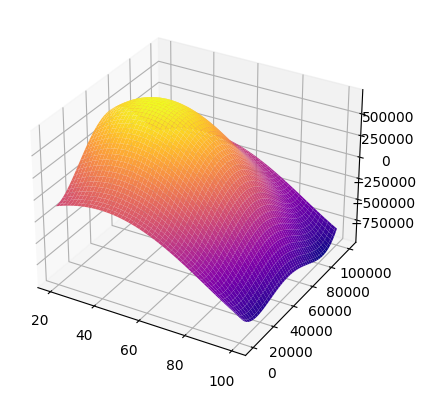

In [116]:
## Plot

# Defining surface and axes
price = np.outer(np.linspace(20, 100, 100), np.ones(100))
advertising = np.outer(np.linspace(0, 100000, 100), np.ones(100)).T

quantity = 10000 - 75*price
profit = 

fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(price, advertising, profit, cmap ='plasma')

plt.show()

# Rotating Visualization
# def rotate(angle):
#     ax.view_init(azim=angle)

# rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

# rot_animation.save('Images/profit.gif', dpi=100, writer='imagemagick')

In [68]:
price_competitor1 = 50
price_competitor2 = 35
price_complement = 15
advertising_lag = 1000
price_lag = 45

price = 61.03318773  
advertising = 37926.86026785

quantity = (10000 
            +75*price_competitor1
            +50*price_competitor2
            -20*price_complement
            +0.001*advertising_lag
            -25*price_lag
            -50*price
            -2*price**2
            +0.00001*advertising
            +0.000001*advertising**2)

prod_cost = 50 - 0.0005*quantity
profit = price * quantity - quantity * prod_cost - advertising


print(f"Quantity: {round(quantity,2)}")
print(f"Total Revenue: ${round(price*quantity,2)}")
print(f"Total Cost: ${round(quantity*prod_cost+advertising,2)}")
print(f"Profit: ${round(profit,2)}")

Quantity: 5013.07
Total Revenue: $305963.44
Total Cost: $276014.77
Profit: $29948.66


## Visuals

### Cover Photo

In [ ]:
# Defining surface and axes
x = np.outer(np.linspace(0, 5, 50), np.ones(50))
y = x.copy().T
z = np.sin(x)*np.cos(y)
 
fig = plt.figure(dpi=600,figsize=(10,10))
# fig = plt.figure()

# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.axis('off')
ax.grid(False)

plt.show()

In [ ]:
from matplotlib import animation

def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation.save('Images/cover_rotation.gif', dpi=80, writer='imagemagick')

### Parabola Visual

In [ ]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre
fig = plt.figure(dpi=600)
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.scatter(-1/3, float(function.evalf(subs=values[10])), c='black')
plt.plot(x,y,'r')

# show the plot
plt.show()

### Gradient Descent Animation

In [ ]:
# Defining surface and axes
x = np.linspace(-5.5, 5, 100)
y = 3*x**2 + 2*x - 24

# setting the axes at the centre
fig = plt.figure(dpi=600)
ax = fig.add_subplot(1, 1, 1)
# ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('right')
ax.set_yticks([60,45,30,15,0,-15])
ax.set_xticks([-4,-2,0,2,4])
ax.text(x=-1.75,y=62,s="x=-1/3")
ax.text(x=2.25,y=13,s="Start")
ax.axvline(x=-1/3,linestyle=':',color='black')

# plot the function
plt.plot(x,y,'r')

plt.show()

## Gradient Descent Animation

x2=[]
y2=[]

def animate(iterations):
    x2.append(float([v for v in GD_values[iterations].values()][0]))
    y2.append(float(function.evalf(subs=GD_values[iterations])))
    ax.scatter(x2, y2, c='black')

rot_animation = animation.FuncAnimation(fig, animate, frames=len(GD_values),interval=500)

rot_animation.save('Images/gradient_descent.gif', dpi=600)

### Rosenbrock's Parabolic Valley

In [ ]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-10, 10, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
fig = plt.figure(dpi=600,figsize=(5,5))
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma')

plt.show()

## Rotating Visualization
def rotate(angle):
    ax.view_init(azim=angle)

rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=100)

rot_animation.save('Images/rotation.gif', dpi=100, writer='imagemagick')

### Newton Method Visualization

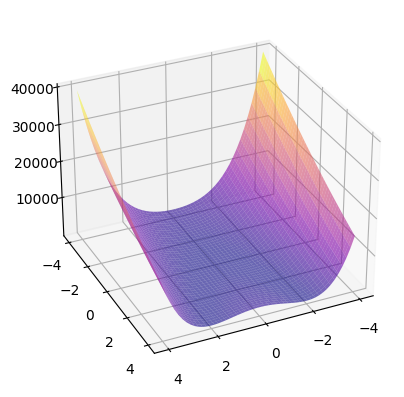

MovieWriter ffmpeg unavailable; using Pillow instead.


In [31]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(-4, 4, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma',alpha=0.6)
ax.view_init(elev=30, azim=65)

plt.show()


## Newton Method Animation

x2=[]
y2=[]
z2=[]

def animate(iterations):

    # Append & plot x and y values from optimization
    x2.append(float([v for v in NM_values[iterations].values()][0]))
    y2.append(float([v for v in NM_values[iterations].values()][1]))
    z2.append(float(function.evalf(subs=NM_values[iterations])))
    ax.scatter(x2, y2, z2, c='black')
    ax.plot(x2, y2, z2, c='black')

rot_animation = animation.FuncAnimation(fig, animate, frames=len(NM_values),interval=1000)

rot_animation.save('Images/newton_method2.gif', dpi=100)

### Constrained Newton Method Visualization

MovieWriter ffmpeg unavailable; using Pillow instead.


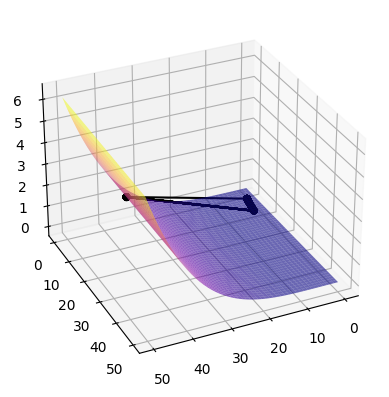

In [3]:
## Plot

# Defining surface and axes
x = np.outer(np.linspace(0, 50, 50), np.ones(50))
y = x.copy().T
z = 100*(y-x**2)**2 + (1-x)**2
 
fig = plt.figure()
# syntax for 3-D plotting
ax = plt.axes(projection ='3d')
# ax.set_xticks([-10,-5,0,5,10])
# ax.set_yticks([-10,-5,0,5,10])

# syntax for plotting
ax.plot_surface(x, y, z, cmap ='plasma',alpha=0.6)
ax.view_init(elev=30, azim=65)

plt.show()

## Constrained Newton Method Animation

x2=[]
y2=[]
z2=[]

x, y  = sm.symbols('x y')
function = 100*(y-x**2)**2 + (1-x)**2

def animate(iterations):

    # Append & plot x and y values from optimization
    x2.append(float([v for v in constrained_NM_values[iterations].values()][0]))
    y2.append(float([v for v in constrained_NM_values[iterations].values()][1]))
    z2.append(float(function.evalf(subs=constrained_NM_values[iterations])))
    ax.scatter(x2, y2, z2, c='black')
    ax.plot(x2, y2, z2, c='black')

rot_animation = animation.FuncAnimation(fig, animate, frames=len(constrained_NM_values),interval=1000)

rot_animation.save('Images/constrained_newton_method.gif', dpi=100)